## Data Culture 2023 Cohorts

In [ ]:
# import relevant packages and set formatting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter as dates
import datetime as dt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
plt.rcParams['font.family'] = 'Lora'

In [43]:
# bring in attendance sheets from all three cohort topics (JavaScript, Python, and Power BI)
js = pd.read_csv('attendance/js.csv')
py = pd.read_csv('attendance/py.csv')
pbi = pd.read_csv('attendance/pbi.csv').drop(columns='10.30.23_optional').reset_index(drop=True)

In [4]:
# select attendance-related columns from attendance sheets by date
js_atnd = js.iloc[:, 8:19]
py_atnd = py.iloc[:, 11:21]
pbitues_atnd = pbi[pbi['Cohort']=='Tuesday'].iloc[:, 9:21]
pbiweds_atnd = pbi[pbi['Cohort']=='Wednesday'].iloc[:, 9:21]

# remove meeting type (VLM, HLM) from the start of the column titles in js
js_atnd.columns = [col.split('_')[1] for col in js_atnd.columns]

# create a function to melt, set date datatype, and groupby attendance data to prepare for visualization
def melt_group_date(table):
    table = pd.melt(table, var_name='Meeting Date', value_name='Attendance')
    table['Meeting Date'] = pd.to_datetime(table['Meeting Date'], format='%m.%d.%y')
    table = table.groupby(by='Meeting Date', as_index=False).sum()
    return table

# run the melt_group_date function on all attendance tables
js_atnd = melt_group_date(js_atnd)
py_atnd = melt_group_date(py_atnd)
pbitues_atnd = melt_group_date(pbitues_atnd)
pbiweds_atnd = melt_group_date(pbiweds_atnd)

In [27]:
# select attendance-related columns from attendance sheets by staff person
js_stf = js.iloc[:, np.r_[6, 8:19]]
py_stf = py.iloc[:, np.r_[8, 11:21]]
pbi_stf = pbi.iloc[:, np.r_[6, 9:21]]

def melt_group(table):
    table = pd.melt(table, id_vars = 'Email', var_name = 'Meeting', value_name='Attendance')
    table = table.groupby(by='Email', as_index=False).sum().drop(columns='Meeting').sort_values(by='Attendance', ascending=False).reset_index(drop=True)
    return table

js_stf = melt_group(js_stf)
py_stf = melt_group(py_stf)
pbi_stf = melt_group(pbi_stf)

In [7]:
# calculate min and max dates for each cohort table to enable dynamic x axes in visualizations
tables = [js_atnd, py_atnd, pbitues_atnd, pbiweds_atnd]
min_dates = {}
max_dates = {}

for i, t in enumerate(tables):
    min_dates['min_date{}'.format(i)] = min(t['Meeting Date'])
    max_dates['max_date{}'.format(i)] = max(t['Meeting Date'])

In [8]:
# create the attendance percentage variables
js_50 = '{:.0%}'.format(len(js_stf[js_stf['Attendance']>=len(js_atnd['Meeting Date'])/2]) / len(js_stf['Email']))
py_50 = '{:.0%}'.format(len(py_stf[py_stf['Attendance']>=len(py_atnd['Meeting Date'])/2]) / len(py_stf['Email']))
pbi_50 = '{:.0%}'.format(len(pbi_stf[pbi_stf['Attendance']>=len(pbitues_atnd['Meeting Date'])/2]) / len(pbi_stf['Email']))

Text(0.0, 1.0, 'Power BI')

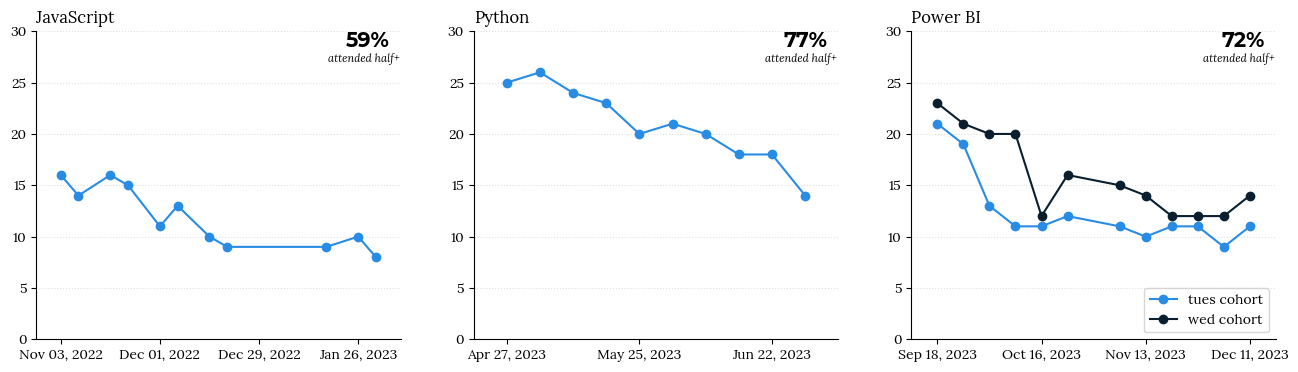

In [9]:
# create three subplots, one for each topic
f, ax = plt.subplots(1, 3, figsize=(16,4))   

# plot attendance lines
ax[0].plot(js_atnd['Meeting Date'], js_atnd['Attendance'], marker='o', color='#288BE4')
ax[0].text(0.85,0.95,js_50, transform=ax[0].transAxes, size=15, family = 'Montserrat', weight='bold')
ax[1].plot(py_atnd['Meeting Date'], py_atnd['Attendance'], marker='o', color='#288BE4')
ax[1].text(2.05,0.95,py_50, transform=ax[0].transAxes, size=15, family = 'Montserrat', weight='bold')
ax[2].plot(pbitues_atnd['Meeting Date'], pbitues_atnd['Attendance'], marker='o', color='#288BE4', label = 'tues cohort')
ax[2].plot(pbiweds_atnd['Meeting Date'], pbiweds_atnd['Attendance'], marker='o', color='#091F2F', label = 'wed cohort')
ax[2].legend(loc='lower right')
ax[2].text(3.25,0.95,pbi_50, transform=ax[0].transAxes, size=15, family = 'Montserrat', weight='bold')

# set shared formatting for all three plots
for i, axs in enumerate(ax):
    axs.grid(True, axis='y', color='#E0E0E0', linestyle=':')
    axs.set_ylim(0, 30)
    axs.xaxis.set_major_formatter(dates('%b %d, %Y'))
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    axs.set_xlim([min_dates['min_date{}'.format(i)]-dt.timedelta(days=7), max_dates['max_date{}'.format(i)]+dt.timedelta(days=7)])
    axs.set_xticks(np.arange(min_dates['min_date{}'.format(i)], max_dates['max_date{}'.format(i)]+dt.timedelta(days=7), dt.timedelta(days=28)))
    axs.text(0.8,0.9,'attended half+', style='italic', transform=axs.transAxes, size=8)

# set titles
ax[0].set_title('JavaScript', loc='left')
ax[1].set_title('Python', loc='left')
ax[2].set_title('Power BI', loc='left')